In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import cluster
%matplotlib inline
#import packages
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
        

In [2]:
denuncia = pd.read_csv(r"C:\Users\bigdata\Desktop\pedro.csv", encoding = "latin-1")


In [3]:
denuncia.head()

,TIPIFICACION,FECHA_AVISO,DIA,MES,HORA_AVISO,COLONIA_SUCESO,oxxos
0,VIOLENCIA FAMILIAR,16/07/2013,martes,julio,22:01,BARRANCA DEL PEDREGAL,0
1,VIOLENCIA FAMILIAR,06/09/2013,viernes,septiembre,20:20,BARRANCA DEL PEDREGAL,0
2,VIOLENCIA FAMILIAR,15/01/2013,martes,enero,09:18,COLONIA FUENTES DEL VALLE,1
3,VIOLENCIA FAMILIAR,03/08/2013,sábado,agosto,12:16,DEL VALLE,7
4,VIOLENCIA FAMILIAR,31/10/2013,jueves,octubre,14:10,DEL VALLE,7


In [4]:
list(denuncia.columns.values)

['TIPIFICACION',
 'FECHA_AVISO',
 'DIA',
 'MES',
 'HORA_AVISO',
 'COLONIA_SUCESO',
 'oxxos']

In [5]:
denuncia.describe(include="all")


,TIPIFICACION,FECHA_AVISO,DIA,MES,HORA_AVISO,COLONIA_SUCESO,oxxos
count,148,148,148,148,148,148,148.000000
unique,1,104,7,12,142,42,NaN
top,VIOLENCIA FAMILIAR,04/08/2013,domingo,agosto,20:20,SAN PEDRO 400,NaN
freq,148,6,47,29,2,45,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.108108
std,NaN,NaN,NaN,NaN,NaN,NaN,0.817622
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [6]:
coloniadenuncia = pd.crosstab(index=denuncia["TIPIFICACION"], columns=denuncia["COLONIA_SUCESO"])
coloniadenuncia


COLONIA_SUCESO,BARRANCA DEL PEDREGAL,COLONIA FUENTES DEL VALLE,DEL VALLE,EL OBISPO,EL OBISPO II,FRACC SANTA BARBARA,FUENTES DEL VALLE SECT 7 COLINAS,JARDINES DEL VALLE,JESUS M. GARZA,LA BARRANCA,...,SANTA BARBARA,SANTA ELENA,SIERRA MADRE,TAMPIQUITO,UNIDAD SAN PEDRO,VALLE DE SAN AGUSTIN,VALLE DE SANTA ENGRACIA,VALLE DEL MIRADOR,VALLE ORIENTE,VISTA MONTAÑA
TIPIFICACION,,,,,,,,,,,,,,,,,,,,,
VIOLENCIA FAMILIAR,2,1,2,3,2,1,1,2,2,1,...,3,1,1,3,5,1,2,3,2,10


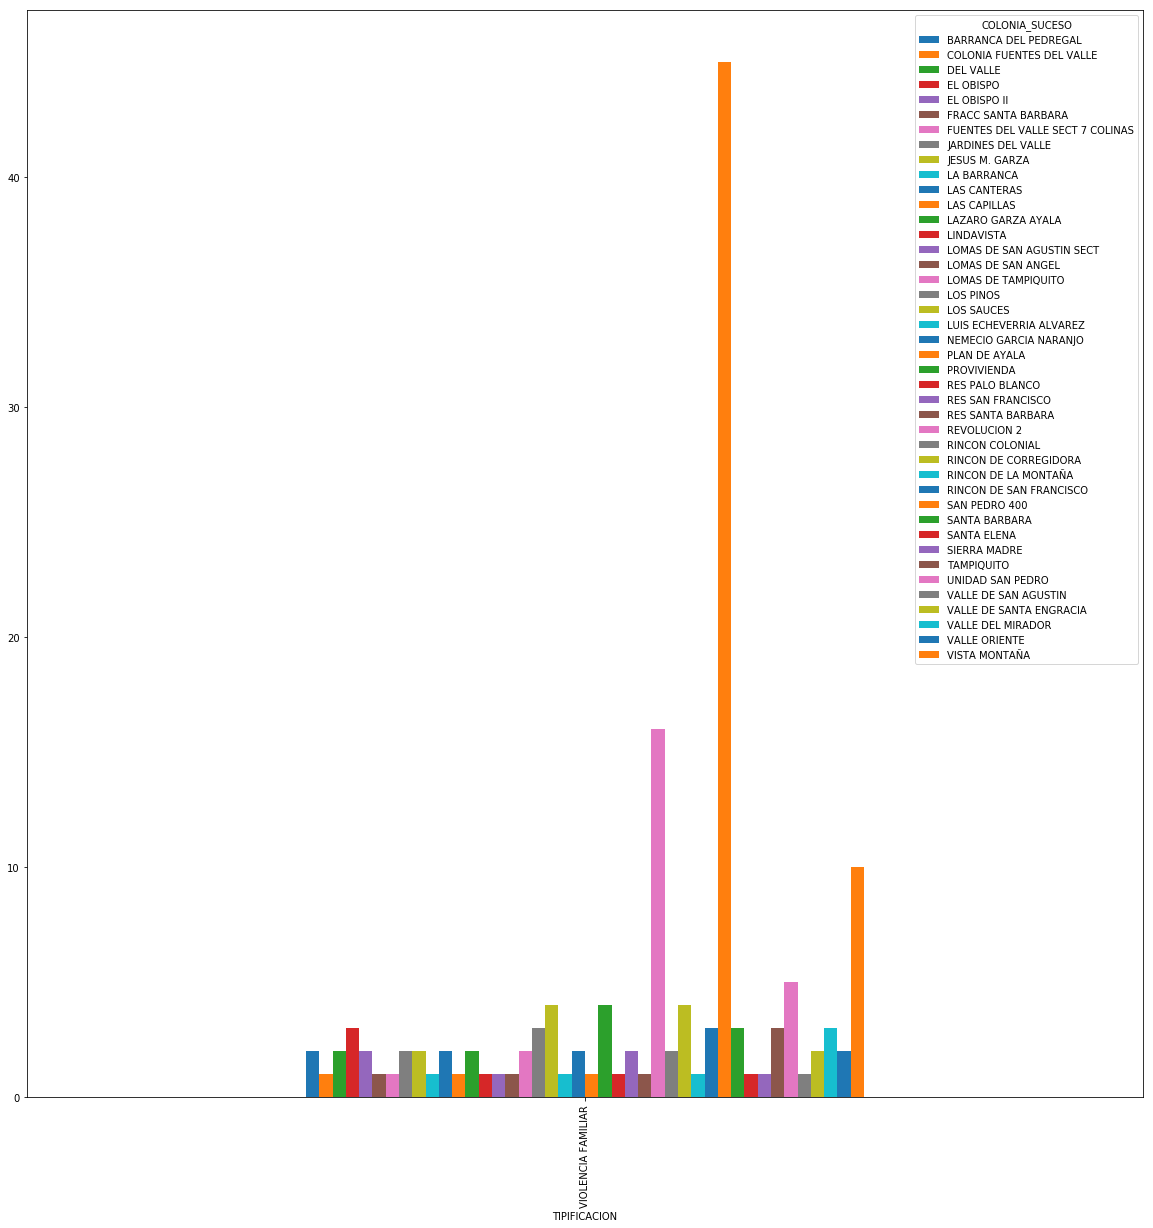

In [7]:
coloniadenuncia.plot(kind="bar", figsize=(20,20)) #colonia san pedro 300 es la más violenta.Seguida de unidad san pedro

In [8]:
horavscolonia = pd.crosstab(index=denuncia["HORA_AVISO"], columns=denuncia["COLONIA_SUCESO"])

In [9]:
horavscolonia.describe()

COLONIA_SUCESO,BARRANCA DEL PEDREGAL,COLONIA FUENTES DEL VALLE,DEL VALLE,EL OBISPO,EL OBISPO II,FRACC SANTA BARBARA,FUENTES DEL VALLE SECT 7 COLINAS,JARDINES DEL VALLE,JESUS M. GARZA,LA BARRANCA,...,SANTA BARBARA,SANTA ELENA,SIERRA MADRE,TAMPIQUITO,UNIDAD SAN PEDRO,VALLE DE SAN AGUSTIN,VALLE DE SANTA ENGRACIA,VALLE DEL MIRADOR,VALLE ORIENTE,VISTA MONTAÑA
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,...,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,0.014085,0.007042,0.014085,0.021127,0.014085,0.007042,0.007042,0.014085,0.014085,0.007042,...,0.021127,0.007042,0.007042,0.021127,0.035211,0.007042,0.014085,0.021127,0.014085,0.070423
std,0.118257,0.083918,0.118257,0.144316,0.118257,0.083918,0.083918,0.118257,0.118257,0.083918,...,0.144316,0.083918,0.083918,0.144316,0.184966,0.083918,0.118257,0.144316,0.118257,0.256763
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
#save numerial data only
st = horavscolonia[horavscolonia.columns[0:]]
st.index = horavscolonia.ix[:,1]

In [11]:
#analysis
#create linkage matrix for clustering
z=linkage(st, "ward")

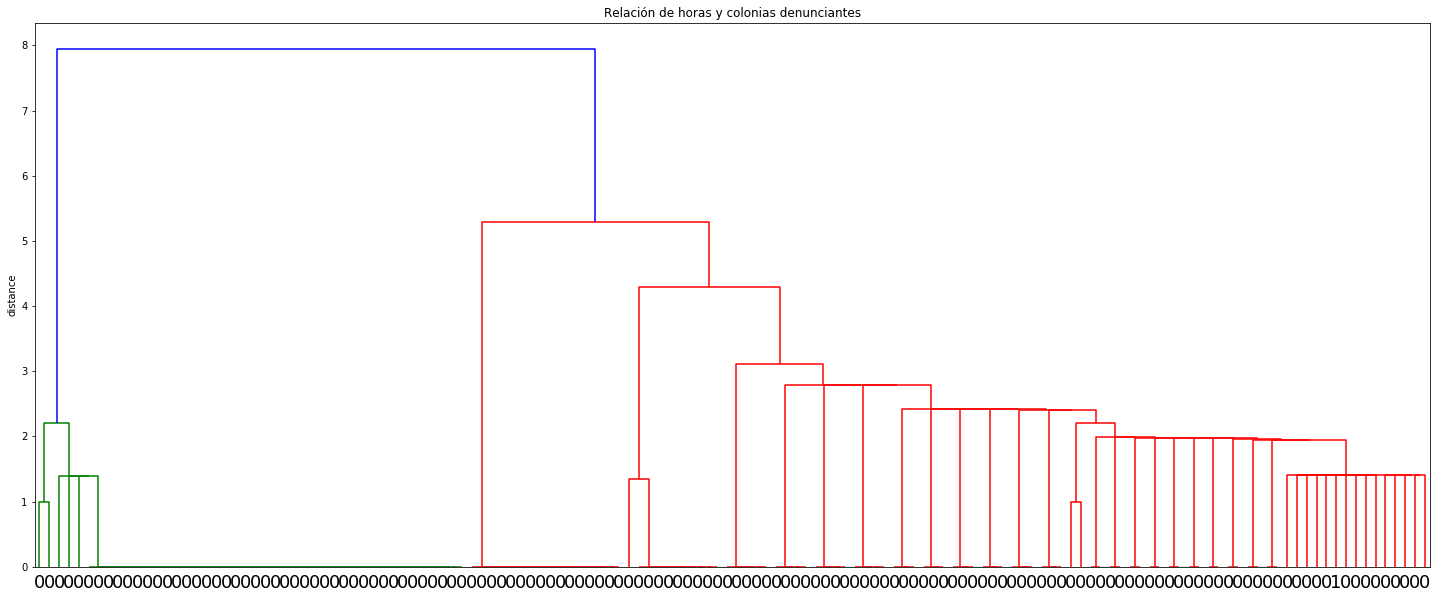

In [12]:
#plot dendrograma of cluters
plt.figure(figsize = (25, 10))
plt.title("Relación de horas y colonias denunciantes")
plt.ylabel("distance")
dendrogram(
z,
labels = st.index,
leaf_rotation = 0.,
leaf_font_size =18.,
)
plt.show()


In [19]:

# tabla de frecuencia de colonia suceso
pd.value_counts(denuncia['COLONIA_SUCESO'])

SAN PEDRO 400                       45
REVOLUCION 2                        16
VISTA MONTAÑA                       10
UNIDAD SAN PEDRO                     5
RINCON DE CORREGIDORA                4
LOS SAUCES                           4
PROVIVIENDA                          4
TAMPIQUITO                           3
LOS PINOS                            3
SANTA BARBARA                        3
VALLE DEL MIRADOR                    3
RINCON DE SAN FRANCISCO              3
EL OBISPO                            3
LOMAS DE TAMPIQUITO                  2
JESUS M. GARZA                       2
RES SAN FRANCISCO                    2
VALLE ORIENTE                        2
VALLE DE SANTA ENGRACIA              2
NEMECIO GARCIA NARANJO               2
BARRANCA DEL PEDREGAL                2
LAZARO GARZA AYALA                   2
JARDINES DEL VALLE                   2
LAS CANTERAS                         2
RINCON COLONIAL                      2
EL OBISPO II                         2
DEL VALLE                

In [20]:
# tabla de frecuencia relativa de pasajeros
100 * denuncia['COLONIA_SUCESO'].value_counts() / len(denuncia['COLONIA_SUCESO'])

SAN PEDRO 400                       30.405405
REVOLUCION 2                        10.810811
VISTA MONTAÑA                        6.756757
UNIDAD SAN PEDRO                     3.378378
RINCON DE CORREGIDORA                2.702703
LOS SAUCES                           2.702703
PROVIVIENDA                          2.702703
TAMPIQUITO                           2.027027
LOS PINOS                            2.027027
SANTA BARBARA                        2.027027
VALLE DEL MIRADOR                    2.027027
RINCON DE SAN FRANCISCO              2.027027
EL OBISPO                            2.027027
LOMAS DE TAMPIQUITO                  1.351351
JESUS M. GARZA                       1.351351
RES SAN FRANCISCO                    1.351351
VALLE ORIENTE                        1.351351
VALLE DE SANTA ENGRACIA              1.351351
NEMECIO GARCIA NARANJO               1.351351
BARRANCA DEL PEDREGAL                1.351351
LAZARO GARZA AYALA                   1.351351
JARDINES DEL VALLE                

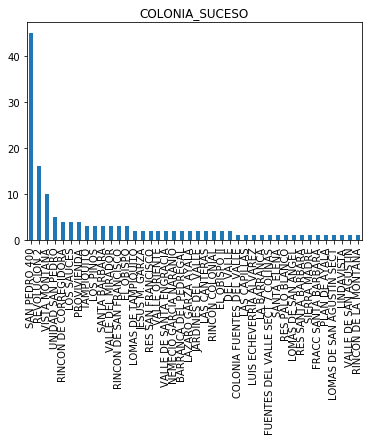

In [21]:
 #Gráfico de barras de pasajeros del Titanic
plot = denuncia['COLONIA_SUCESO'].value_counts().plot(kind='bar',
                                            title='COLONIA_SUCESO')

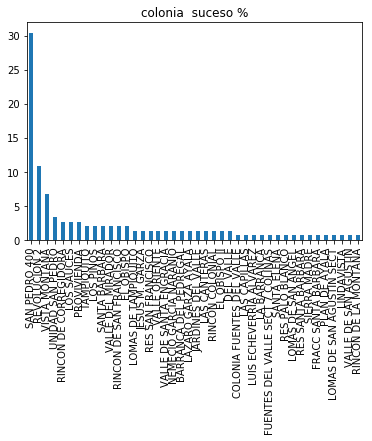

In [22]:
# gráfico de barras de frecuencias relativas.
plot = (100 * denuncia['COLONIA_SUCESO'].value_counts() / len(denuncia['COLONIA_SUCESO'])).plot(
kind='bar', title='colonia  suceso %')

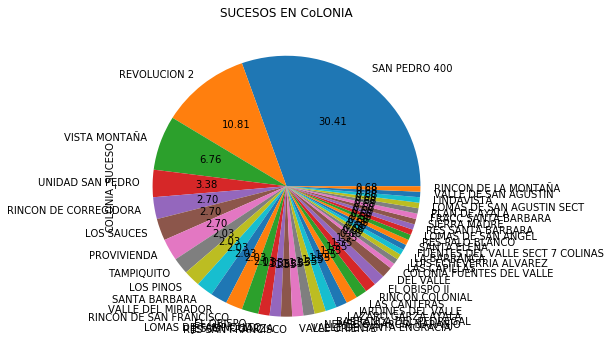

In [23]:
# Gráfico de tarta de pasajeros del Titanic
plot = denuncia['COLONIA_SUCESO'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='SUCESOS EN CoLONIA')

In [26]:
kmeans = cluster.KMeans(3)
kmeans.fit(denuncia[['TIPIFICACION']])
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
plt.scatter(denuncia['COLONIA_SUCESO'].value_counts(), denuncia['HORA_SUCESO'].value_counts(), c=labels)
plt.show()
print (centroids)

ValueError: could not convert string to float: 'VIOLENCIA FAMILIAR'

In [1]:
!pip install googlemaps

  Running setup.py bdist_wheel for gmaps: started
  Running setup.py bdist_wheel for gmaps: finished with status 'done'
  Stored in directory: C:\Users\bigdata\AppData\Local\pip\Cache\wheels\5f\ee\c6\b3916ee22e305a44f8c67e3f2d51f1281b6705532bd72bd0dd
Successfully built gmaps


In [3]:
!pip install googlemaps

  Running setup.py bdist_wheel for googlemaps: started
  Running setup.py bdist_wheel for googlemaps: still running...
  Running setup.py bdist_wheel for googlemaps: finished with status 'done'
  Stored in directory: C:\Users\bigdata\AppData\Local\pip\Cache\wheels\68\86\e5\24d7745c945e0e0f20dc1da6a151d2dcbf30e29f9f3238f6d2
Successfully built googlemaps
  Found existing installation: requests 2.12.4
    Uninstalling requests-2.12.4:
      Successfully uninstalled requests-2.12.4
